<a href="https://colab.research.google.com/github/FerdousJUST/InceptionV3-model-implementation-for-Fish-Image-Classification-/blob/main/InceptionV3_fish_image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [20]:
import os
import shutil
import glob

In [21]:
TRAIN_DIR = "/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 "
ORG_DIR = " /content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training"
CLASS = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']

In [22]:
for c in CLASS: 
  DEST = os.path.join(TRAIN_DIR,c)
  if not os.path.exists(DEST):
    os.makedirs(DEST)

  for img_path in glob.glob(os.path.join(ORG_DIR,c)+ " * "):
    SRC = img_path
    shutil.copy(SRC,DEST)

In [23]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense,Flatten
from keras.models import Model  
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras

In [24]:
base_model = InceptionV3(input_shape = (256,256,3),include_top= False)

In [25]:
for layer in base_model.layers:
  layer.trainable = False

In [26]:
x = Flatten()(base_model.output)
x = Dense(units = 4, activation = 'softmax')(x)

model = Model(base_model.input,x)
#model.compile(optimizer = 'adam',loss= 'sparse_categorical_crossentropy ',metrics = ['accuracy'])
model.compile(optimizer = 'adam',loss = keras.losses.binary_crossentropy,metrics = ['accuracy'])


In [27]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 127, 127, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [28]:
train_datagen = ImageDataGenerator(featurewise_center= True,
                                   rotation_range = 0.4,
                                   width_shift_range=0.3,
                                   horizontal_flip=True,
                                   preprocessing_function=preprocess_input,
                                   zoom_range = 0.4,
                                   shear_range = 0.4 )
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size = (256,256),
                                               batch_size = 36)

Found 4800 images belonging to 4 classes.


In [29]:
train_data.class_indices

{'Barbel_Fish': 0,
 'Hilsha_Fish': 1,
 'Spotted_Snakehead_Fish': 2,
 'Tilapia_Fish': 3}

In [30]:
t_img,label = train_data.next()


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [31]:
t_img

array([[[[ 0.5325748 ,  0.5404179 ,  0.57179046],
         [ 0.53783226,  0.5456754 ,  0.57704794],
         [ 0.54509807,  0.5529412 ,  0.58431375],
         ...,
         [ 0.4701295 ,  0.47797263,  0.5171883 ],
         [ 0.47658086,  0.484424  ,  0.5236397 ],
         [ 0.48123848,  0.48908162,  0.5282973 ]],

        [[ 0.53310394,  0.5409471 ,  0.5723196 ],
         [ 0.536633  ,  0.54447615,  0.5758487 ],
         [ 0.54010713,  0.54795027,  0.5793228 ],
         ...,
         [ 0.46668935,  0.47453249,  0.5137483 ],
         [ 0.46979916,  0.4776423 ,  0.516858  ],
         [ 0.47450984,  0.48235297,  0.52156866]],

        [[ 0.53517866,  0.5430218 ,  0.57439435],
         [ 0.5387547 ,  0.54659784,  0.5779704 ],
         [ 0.5411769 ,  0.54902005,  0.5803926 ],
         ...,
         [ 0.47346365,  0.4813068 ,  0.5205225 ],
         [ 0.47387743,  0.48172057,  0.52093625],
         [ 0.47450984,  0.48235297,  0.52156866]],

        ...,

        [[ 0.36273348,  0.37057662,  0

In [32]:
t_img.shape

(36, 256, 256, 3)

In [33]:
def plotImages (img_arr,label):
  for idx,img in enumerate(img_arr):
    if idx <= 10:
      plt.figure(figsize = (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()


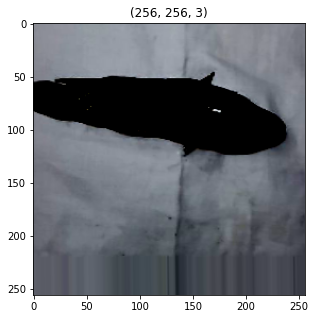

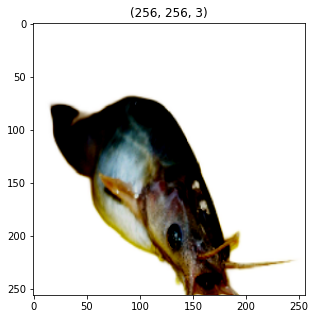

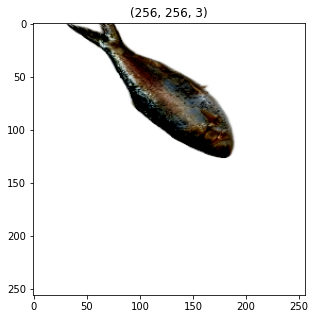

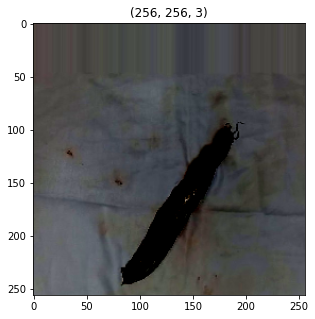

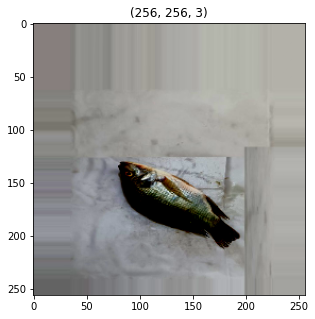

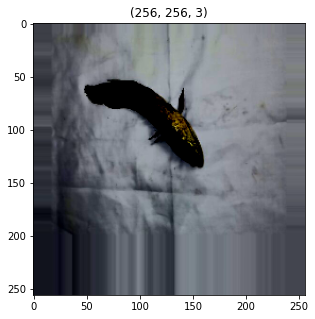

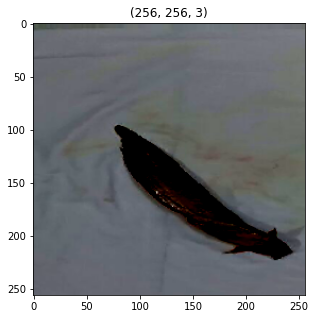

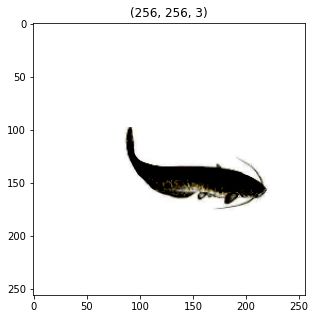

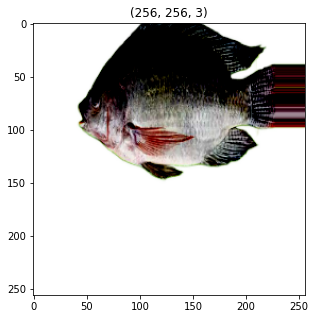

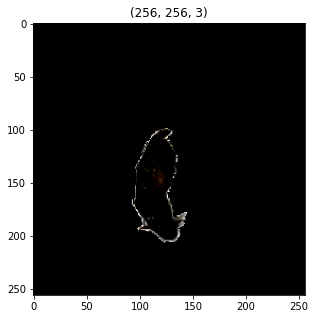

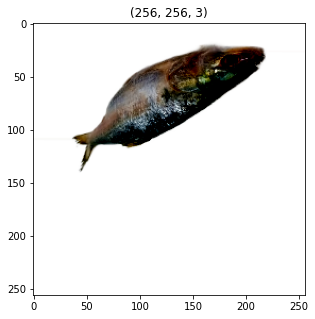

In [34]:
plotImages(t_img,label)

In [50]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc = ModelCheckpoint(filepath = " /content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part eleven/inception_model.h5",
                      monitor = " accuracy",
                      varbose = 2,
                      save_best_only = True)

es = EarlyStopping(monitor = "accuracy",
                   min_delta = 0.001,
                   patience=5,
                   verbose = 2)
cb = [mc,es]

In [51]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part eleven/inception_model(1).h5')

In [52]:
from keras import callbacks
his = model.fit_generator(train_data,
                          steps_per_epoch = 10,
                          epochs = 20,
                          callbacks = cb
                          )

<ipython-input-52-5d6d9fb2d453>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train_data,


Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.1574 - accuracy: 0.9667

10/10 [==============================] - 63s 6s/step - loss: 0.1574 - accuracy: 0.9667
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.1317 - accuracy: 0.9667

10/10 [==============================] - 63s 6s/step - loss: 0.1317 - accuracy: 0.9667
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.1263 - accuracy: 0.9556

10/10 [==============================] - 59s 6s/step - loss: 0.1263 - accuracy: 0.9556
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.1043 - accuracy: 0.9667

10/10 [==============================] - 63s 6s/step - loss: 0.1043 - accuracy: 0.9667
Epoch 5/20
10/10 [==============================] - ETA: 0s - loss: 0.0702 - accuracy: 0.9889

10/10 [==============================] - 59s 6s/step - loss: 0.0702 - accuracy: 0.9889
Epoch 6/20
10/10 [==============================] - ETA: 0s - loss: 0.1243 - accuracy: 0.9611

10/10 [==============================] - 63s 6s/step - loss: 0.1243 - accuracy: 0.9611
Epoch 7/20
10/10 [==============================] - ETA: 0s - loss: 0.1221 - accuracy: 0.9694

10/10 [==============================] - 59s 6s/step - loss: 0.1221 - accuracy: 0.9694
Epoch 8/20
10/10 [==============================] - ETA: 0s - loss: 0.1356 - accuracy: 0.9639

10/10 [==============================] - 61s 6s/step - loss: 0.1356 - accuracy: 0.9639
Epoch 9/20
10/10 [==============================] - ETA: 0s - loss: 0.1014 - accuracy: 0.9750

10/10 [==============================] - 57s 6s/step - loss: 0.1014 - accuracy: 0.9750
Epoch 10/20
10/10 [==============================] - ETA: 0s - loss: 0.0941 - accuracy: 0.9750

10/10 [==============================] - 62s 6s/step - loss: 0.0941 - accuracy: 0.9750
Epoch 10: early stopping


In [43]:
from keras.models import load_model
model = load_model(" /content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part eleven/inception_model(1).h5")

OSError: ignored

In [53]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy'])

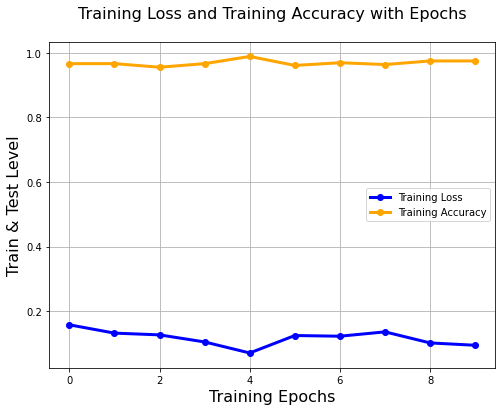

In [54]:
#plt.plot(h['loss'],'go--',c="green")
#plt.plot(h['accuracy'],'go--',c="blue")
#plt.title("Loss vs Acc")
#plt.show()

plt.figure(figsize = (8,6))
plt.plot(his.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(his.history['accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Training Loss', 'Training Accuracy'], loc='center right')
plt.title("Training Loss and Training Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Level",fontsize =16)
plt.show()

In [66]:
from keras.utils.image_utils import img_to_array,load_img
path = "/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 /Barbel_Fish/Barbel_Fish 002.jpg"
img = load_img(path,target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("Barbel Fish")
else:
  print("Hilsha Fish")


  plt.imshow(input_arr[0])
  plt.title("input image")
  plt.show()

1/1 [==============================] - 0s 182ms/step
Barbel Fish


1/1 [==============================] - 0s 182ms/step


Hilsha Fish


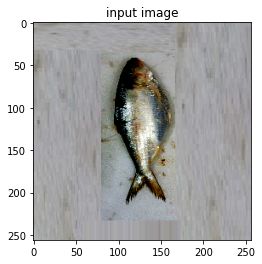

In [67]:
from keras.utils.image_utils import img_to_array,load_img
path = "/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 /Hilsha_Fish/Hilsha_Fish 002.jpg"
img = load_img(path,target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("Barbel Fish")
else:
  print("Hilsha Fish")


  plt.imshow(input_arr[0])
  plt.title("input image")
  plt.show()

In [70]:
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 /Spotted_Snakehead_Fish/Spotted_Fish 002.jpg', 
                      target_size = (256,256))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 184ms/step
[[0. 0. 1. 0.]]
[2, 1, 0, 3]
Spotted_Snakehead_Fish : 100.0 %
Hilsha_Fish : 0.0 %
Barbel_Fish : 0.0 %
Tilapia_Fish : 0.0 %


In [72]:
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 /Barbel_Fish/Barbel_Fish 004.jpg', 
                      target_size = (256,256))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)

1/1 [==============================] - 0s 197ms/step
[[0.000000e+00 0.000000e+00 1.000000e+00 9.913881e-26]]


In [73]:
from keras.utils.image_utils import img_to_array,load_img
path = "/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 /Hilsha_Fish/Hilsha_Fish 002.jpg"
img = load_img(path,target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("Barbel Fish")
else:
  print("Hilsha Fish")

1/1 [==============================] - 0s 185ms/step
Hilsha Fish


In [78]:
from keras.utils.image_utils import img_to_array,load_img
path = "/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 /Tilapia_Fish/Tilapia_Fish 005.png"
img = load_img(path,target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("Barbel Fish")
elif pred==1:
  print("Hilsha Fish")
elif pred==2:
  print("Spotted Snakehead Fish")
elif pred==3:
  print("Tilapia Fish")

1/1 [==============================] - 0s 181ms/step
Tilapia Fish


In [80]:
from keras.utils.image_utils import img_to_array,load_img
path = "/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 /Barbel_Fish/Barbel_Fish 011.jpg"
img = load_img(path,target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("Barbel Fish")
elif pred==1:
  print("Hilsha Fish")
elif pred==2:
  print("Spotted Snakehead Fish")
elif pred==3:
  print("Tilapia Fish")

1/1 [==============================] - 0s 191ms/step
Barbel Fish


In [81]:
from keras.utils.image_utils import img_to_array,load_img
path = "/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 /Hilsha_Fish/Hilsha_Fish 006.jpg"
img = load_img(path,target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("Barbel Fish")
elif pred==1:
  print("Hilsha Fish")
elif pred==2:
  print("Spotted Snakehead Fish")
elif pred==3:
  print("Tilapia Fish")

1/1 [==============================] - 0s 184ms/step
Hilsha Fish


In [82]:
from keras.utils.image_utils import img_to_array,load_img
path = "/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 /Spotted_Snakehead_Fish/Spotted_Fish 006.jpg"
img = load_img(path,target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("Barbel Fish")
elif pred==1:
  print("Hilsha Fish")
elif pred==2:
  print("Spotted Snakehead Fish")
elif pred==3:
  print("Tilapia Fish")

1/1 [==============================] - 0s 185ms/step
Spotted Snakehead Fish


In [84]:
from keras.utils.image_utils import img_to_array,load_img
path = "/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training1 /Tilapia_Fish/Tilapia_Fish 007.png"
img = load_img(path,target_size=(256,256))
i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))
if pred == 0:
  print("Barbel Fish")
elif pred==1:
  print("Hilsha Fish")
elif pred==2:
  print("Spotted Snakehead Fish")
elif pred==3:
  print("Tilapia Fish")

1/1 [==============================] - 0s 183ms/step
Tilapia Fish


In [103]:
def get_img_arr(img_path):
  img = load_img(path,target_size=(256,256))
  img = img_to_array(img)
  img = preprocess_input(img)
  img = np.array([img])
  return img

In [104]:
import tensorflow as tf


In [126]:
def make_gradcam_heatmap(img_arr,model,last_conv_layer_name,pred_index = None):
  grad_model = tf.keras.models.Model(
    [model.input],[model.get_layer(last_conv_layer_name).output,model.output]

  )

  with tf.GradientTape() as tape:
    last_conv_layer_output,preds = grad_model(img_arr)

    if pred_index is None:
      pred_index = tf.argmax(preds[0])
                             
    class_channel = preds[:,pred_index]

    grads = tape.gradient(class_channel,last_conv_layer_output)  
    pooled_grads = tf.reduce_mean(grads,axis = (0,1,2))

    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output @ pooled_grads[...,tf.newaxis]

    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap,0)/tf.math.reduce_max(heatmap)
    return heatmap.numpy()




                             


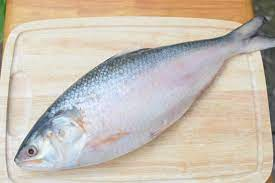

1/1 [==============================] - 1s 1s/step
Predicted: [('n02514041', 'barracouta', 5.9867835)]


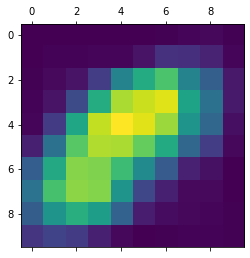

In [132]:
from keras.utils.image_utils import img_to_array,load_img

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = load_img(img_path, target_size=(299,299))
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

# The local path to our target image
#img_path = keras.utils.get_file(
    #"Barbel fish.jpg", "/content/barbel1.jpg"
#)
img_path = "/content/hilsha1.jpg"

display(Image(img_path))

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [119]:
import matplotlib.cm as cm 
from IPython.display import Image,display

In [121]:
def save_and_display_gradcam(img_path,heatmap,cam_path = "cam.jpg",alpha = 0.4):
  img = img_to_array(load_img(img_path))
  heatmap = np.uint8(255*heatmap)
  jet = cm.get_cmap("jet")

  jet_colors = jet(np.arange(256))[:,:3]
  jet_heatmap = jet_colors[heatmap]


  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1],img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)


  superimposed_img = jet_heatmap * alpha + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

  superimposed_img.save(cam_path)

  display(Image(cam_path)) 
  save_and_display_gradcam(img_path, heatmap)


In [135]:
def image_prediction_and_visualization(path,last_conv_layer_name = "conv2d_93",model = model):
  img_array = get_img_arr(path)

  heatmap = make_gradcam_heatmap(img_array,model,last_conv_layer_name)

  plt.title("the heat map of the image is: ")
  plt.imshow(heatmap)
  plt.show()

  pred = np.argmax(model.predict(preprocess_input(img_array)))
  print()
  print()
  print()

if pred == 0:
  print("Barbel Fish")
elif pred==1:
  print("Hilsha Fish")
elif pred==2:
  print("Spotted Snakehead Fish")
elif pred==3:
  print("Tilapia Fish")

print()
print()
print()

print("image with heatmap reporting region on interest")


#save_and_display_gradcam(path,heatmap)

print()
print("the original input image")
print()



a= plt.imread(path)
plt.imshow(a,cmap = "gray")
plt.title("Original Image")
plt.show()



path = "/content/hilsha1.jpg"
image_prediction_and_visualization(path)

Tilapia Fish



image with heatmap reporting region on interest

the original input image



FileNotFoundError: ignored